In [133]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [135]:
fmnist = tf.keras.datasets.fashion_mnist

In [137]:
(training_images, training_labels),(test_images, test_labels) = fmnist.load_data()

Training Label: 9

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1

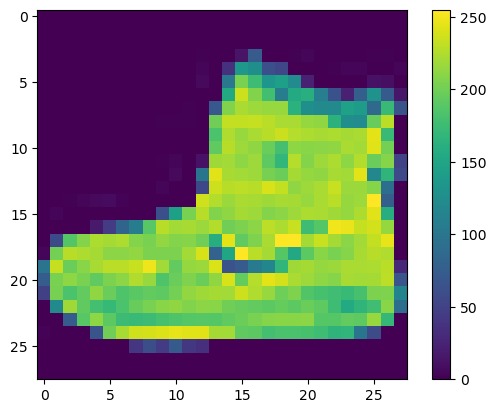

In [138]:
index = 0

np.set_printoptions(linewidth= 320)

print(f"Training Label: {training_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n")

plt.imshow(training_images[index])
plt.colorbar()
plt.show()

Training Label: 3

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   1   0   0   9   6   0   0   0  24   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 209 231 248 252 250 253 246 206 132   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1 227 243 234 234 248 246 238 230 234 250 126   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  57 231 213 227 234 232 231 235 232 218 218 222   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  90 239 207 213 236 235 232 232 229 210 215 207   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 211 245 229 197 220 221 221 222 203 221 235 222  96   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  55 154 239 213 217 218 214 215 215 199 235 167  61   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  17 238 220 221 215 210 249  98   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0

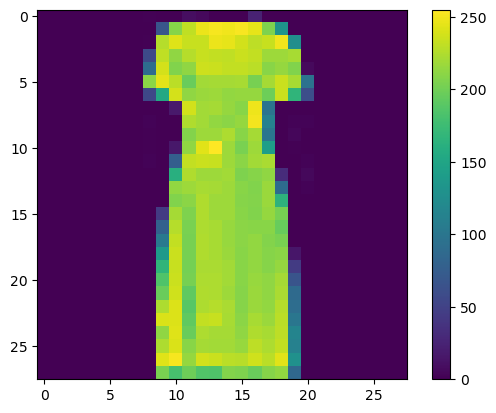

In [139]:
index = 50

np.set_printoptions(linewidth= 320)

print(f"Training Label: {training_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n")

plt.imshow(training_images[index])
plt.colorbar()
plt.show()

## Normalization


In [142]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [143]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = None):
        if logs['loss'] < 0.4:
            print("\nLoss is lower than 0.4 so cancelling training!")
            self.model.stop_training = True


In [145]:
model = tf.keras.Sequential([
    tf.keras.Input(shape= (28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])
    
                          

In [146]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [148]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [149]:
model.fit(training_images,training_labels, epochs = 5, callbacks=[mycallback()])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7900 - loss: 0.5853
Epoch 2/5
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8675 - loss: 0.3673
Loss is lower than 0.4 so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8675 - loss: 0.3673


In [152]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8642 - loss: 0.3804


[0.38668709993362427, 0.8610000014305115]

In [156]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[1.04900042e-04 2.18271293e-06 1.79560300e-06 1.49649713e-06 3.97333497e-06 1.04472712e-01 1.49004245e-05 7.93258175e-02 2.88273836e-03 8.13189387e-01]


In [157]:
print(test_labels[0])

9
